In [1]:
# Loading the packages required for data analysis
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from textblob import TextBlob
import os
import re
from os.path import join
import seaborn as sns
from numpy import nan

import nltk
from nltk.corpus import stopwords
#print(os.listdir("/media/s/Linux_storage/Analyse_Verkehrswende_Transformation/Data/Updates"))

The next step converts to datetime65 format and sorts by date.

In [2]:
src = "/media/s/Linux_storage/Analyse_Verkehrswende_Transformation/Data/Greenwashing"

fields = ['created_at', 'text']

df = pd.read_csv(join(src, 'greenwashing.csv'), encoding='utf-8', dtype='unicode', 
                   parse_dates=['created_at'], usecols=fields)

# df['text'].head()

## Set up master cleaning function

In [3]:
# Standard cleaning tasks for keyword analysis. (Remove redundant words, but keep the main structure of words.)

my_stopwords = nltk.corpus.stopwords.words('german', 'english')

def remove_links(tweet):
    tweet = re.sub(r'http\S+', '', tweet) # remove http links
    tweet = re.sub(r'bit.ly/\S+', '', tweet) # remove bitly links
    tweet = tweet.strip('[link]') # remove [links]
    return tweet

def remove_users(tweet):
    '''Takes a string and removes retweet and @user information'''
    tweet = re.sub('RT @[\w_]+:', '', tweet) # remove retweet ## Alternatives: RT @[\w_]+: OR (RT\s@[A-Za-z]+[A-Za-z0-9-_]+)
    tweet = re.sub('@[A-Za-z0-9_]', '', tweet) # remove tweeted at ## Alternatives: @[A-Za-z0-9_]+ OR (@[A-Za-z]+[A-Za-z0-9-_]+)
    return tweet

# cleaning master function
def clean_tweet(tweet): 
    tweet = remove_users(tweet)
    tweet = remove_links(tweet)
    tweet = tweet.lower() # lower case
    tweet = re.sub(r'[^\w\s]', ' ', tweet) # strip punctuation
    tweet = re.sub('\s+', ' ', tweet, re.UNICODE) # remove double spacing
    tweet = re.sub('([0-9]+)', '', tweet, re.UNICODE) # remove numbers
    
    return tweet
df = df.dropna(subset=['text']) # delete empty rows
df['clean_text'] = df['text']
df['clean_text'] = df.clean_text.apply(clean_tweet)
df['clean_text'].head(5) # Show example output

0    apollon ulysse sisyphe depuis  ans le mythe fe...
1    vallois harlesharoche ehuffpost ogerfederer om...
2    confused about greenwashing greenwashing is wh...
3     confused about greenwashing greenwashing is w...
4                                                     
Name: clean_text, dtype: object

In [4]:
reindexed_data = df['clean_text']
#reindexed_data.index = pd.DatetimeIndex(pd.date_range(start='2021-06-07', end='2021-07-05 23:00:00', freq="1h"))

df['dates'] = pd.to_datetime(df['created_at'].astype('datetime64[ns]').dt.tz_localize('UTC').dt.tz_convert('Europe/Berlin').dt.tz_localize(None))
reindexed_data.index = df['dates']
reindexed_data.head()

dates
2021-07-06 12:14:10    apollon ulysse sisyphe depuis  ans le mythe fe...
2021-07-07 01:54:05    vallois harlesharoche ehuffpost ogerfederer om...
2021-07-07 01:06:52    confused about greenwashing greenwashing is wh...
2021-07-07 01:52:56     confused about greenwashing greenwashing is w...
2021-07-07 01:52:30                                                     
Name: clean_text, dtype: object

## Select keywords

The next cell generates columns based on keywords. Check additional research prior to this on which terms may make sense. (Qualitative coding, topic modelling, etc.)

In [5]:
protest = [0]*reindexed_data.shape[0]
campaign = [0]*reindexed_data.shape[0]
# inauthentic = [0]*reindexed_data.shape[0] # Tested but turned out irrelevant
misleading = [0]*reindexed_data.shape[0]
truth = [0]*reindexed_data.shape[0]
misinformation = [0]*reindexed_data.shape[0]
accountability = [0]*reindexed_data.shape[0]
# incorrect = [0]*reindexed_data.shape[0] # Tested but turned out irrelevant
fake = [0]*reindexed_data.shape[0]
pinkwashing = [0]*reindexed_data.shape[0]
# deforestation = [0]*reindexed_data.shape[0] # I exclude this data set, because it's peaks are too hiugh.
fact = [0]*reindexed_data.shape[0]
action = [0]*reindexed_data.shape[0]
marketing = [0]*reindexed_data.shape[0]
rights = [0]*reindexed_data.shape[0]
advertising = [0]*reindexed_data.shape[0]
energy = [0]*reindexed_data.shape[0]
infrastructure = [0]*reindexed_data.shape[0]
train = [0]*reindexed_data.shape[0]
resilience = [0]*reindexed_data.shape[0]

for i in range(reindexed_data.shape[0]):
    words = TextBlob(reindexed_data[i]).words
    for word in words:
        if word == "protest" or word == "protesting": protest[i]=1
        if word == "campaign": campaign[i]=1
        #if word == "incorrect": incorrect[i]=1
        #if word == "inauthentic": inauthentic[i]=1
        if word == "true" or word == "truth": truth[i]=1
        if word == "fake": fake[i]=1
        if word == "misinformation": misinformation[i]=1
        if word == "accountability": accountability[i]=1
        if word == "misleading": misleading[i]=1
        if word == "pinkwashing": pinkwashing[i]=1
        #if word == "deforestation": deforestation[i]=1
        if word == "fact": fact[i]=1
        if word == "action": action[i]=1
        if word == "marketing": marketing[i]=1
        if word == "rights": rights[i]=1
        if word == "advertising": advertising[i]=1
        if energy == "energy": energy[i]=1
        if infrastructure == "infrastructure": infrastructure[i]=1
        if train == "train": train[i]=1
        if resilience == "resilience": resilience[i]=1

keywords = pd.DataFrame({'clean_text':reindexed_data,
                        'protest':protest,
                        #'incorrect':incorrect,
                        'misinformation':misinformation,
                        'accountability':accountability,
                        'campaign':campaign,
                        #'inauthentic':inauthentic,
                        'truth':truth,
                        'fact':fact,
                        'fake':fake,
                        'misleading':misleading,
                        'pinkwashing':pinkwashing,
                        'action':action,
                        'marketing':marketing,
                        'rights':rights,
                        'advertising':advertising,
                        'energy':energy,
                        'infrastructure':infrastructure,
                        'train':train,
                        'resilience':resilience,
                        #'deforestation':deforestation,
                        }, index=reindexed_data.index)
                        
#keywords = keywords.reset_index()
#keywords.head

In [25]:
# sanity check
keywords.head()

,clean_text,protest,misinformation,accountability,campaign,truth,fact,fake,misleading,pinkwashing,action,marketing,rights,advertising
dates,,,,,,,,,,,,,,
2021-07-06 12:14:10,apollon ulysse sisyphe depuis ans le mythe fe...,0,0,0,0,0,0,0,0,0,0,0,0,0
2021-07-07 01:54:05,vallois harlesharoche ehuffpost ogerfederer om...,0,0,0,0,0,0,0,0,0,0,0,0,0
2021-07-07 01:06:52,confused about greenwashing greenwashing is wh...,0,0,0,0,0,0,0,1,0,0,0,0,0
2021-07-07 01:52:56,confused about greenwashing greenwashing is w...,0,0,0,0,0,0,0,1,0,0,0,0,0
2021-07-07 01:52:30,,0,0,0,0,0,0,0,0,0,0,0,0,0


The following cells offer different options to select the data based on time groupings. Choose between day, month or hour.

In [91]:
minutes = keywords.resample('D').sum()
minutes

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'RangeIndex'

In [26]:
#daily = keywords.resample('D').sum()
# monthly = keywords.resample('M').sum()
daily = keywords.loc['2020-11-01':'2021-07-06'].reset_index() # Maybe add: 
daily.head()

<ipython-input-26-9fa12d2d43a6>:3: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  daily = keywords.loc['2020-11-01':'2021-07-06'].reset_index() # Maybe add:


,dates,clean_text,protest,misinformation,accountability,campaign,truth,fact,fake,misleading,pinkwashing,action,marketing,rights,advertising
0,2021-07-06 12:14:10,apollon ulysse sisyphe depuis ans le mythe fe...,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2021-07-06 21:46:47,i don t know if there will be a human civilisa...,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2021-07-06 20:40:13,if we can t stop fossil fuel companies from po...,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2021-07-06 05:37:03,extyrrellpvq now shut down hydro quebec export...,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2021-07-04 21:19:12,asticmakers this is epic greenwashing we are n...,0,0,0,0,0,0,0,0,0,0,0,0,0


In [7]:
daily = keywords.resample('D').sum()
# monthly = keywords.resample('M').sum()
daily = keywords.loc['2020-1-01':'2021-06-06'].reset_index() # Set time frame
#daily.head

<ipython-input-7-50976821bd38>:3: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  daily = keywords.loc['2020-1-01':'2021-06-06'].reset_index() # Set time frame


In [8]:
# transform from wide to long
melted = daily.drop(['clean_text'], axis=1, inplace=True)
melted = daily.melt(id_vars=['dates'])
melted

,dates,variable,value
0,2021-04-22 08:43:17,protest,0
1,2020-08-16 22:25:24,protest,0
2,2021-06-04 15:31:33,protest,0
3,2021-03-08 23:59:39,protest,0
4,2020-06-30 17:28:46,protest,0
...,...,...,...
7856273,2020-01-01 00:36:15,resilience,0
7856274,2020-01-01 00:15:41,resilience,0
7856275,2020-01-01 00:16:26,resilience,0
7856276,2020-01-01 00:06:25,resilience,0


## Exploring keyword time series

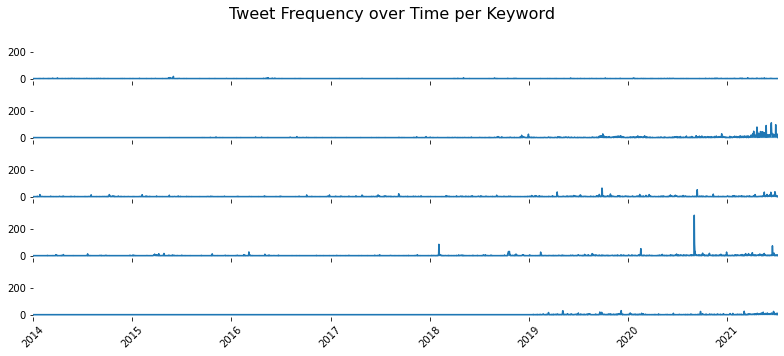

In [27]:
# Generate a seaborn plot with subplots, all sharing the first plot's x axis. 

import seaborn

fig, ax = plt.subplots(5, sharex=True, sharey=True, figsize=(11,5))

fig.suptitle('Tweet Frequency over Time per Keyword', fontsize=16)

# Add subplots 

ax[0].plot(daily['greenmarketing'], label='greenmarketing');
ax[0].fill_between(daily.index, daily['greenmarketing'], color='#539ecd')
#ax[0].text(pd.to_datetime('2014-05-31'), 250, '#greenmarketing', fontsize=12, color='#1f77b4')
ax[0].set_xlim(pd.to_datetime('2014-01-01'), pd.to_datetime('2021-07-06')) # Set dates on x axes
#ax[0].set_title('greenmarketing')

ax[1].plot(daily['climateaction'], label='climateaction');
ax[1].fill_between(daily.index, daily['climateaction'], color='#539ecd')
#ax[1].text(pd.to_datetime('2014-05-31'), 250, 'climateaction', fontsize=12, color='#1f77b4')
#ax[1].set_title('climateaction')

#ax[2].plot(daily['greenwashing'], label='greenwashing');
#ax[2].fill_between(daily.index, daily['greenwashing'], color='#539ecd')
#ax[2].text(pd.to_datetime('2014-05-31'), 250, 'greenwashing', fontsize=12, color='#1f77b4')
#ax[2].set_title('climateaction')

ax[2].plot(daily['pinkwashing'], label='pinkwashing');
ax[2].fill_between(daily.index, daily['pinkwashing'], color='#539ecd')
#ax[2].text(pd.to_datetime('2014-05-31'), 250, 'pinkwashing', fontsize=12, color='#1f77b4')
#ax[2].set_title('pinkwashing')

ax[3].plot(daily['deforestation'], label='deforestation');
ax[3].fill_between(daily.index, daily['deforestation'], color='#539ecd')
#ax[3].text(pd.to_datetime('2014-05-31'), 250, 'deforestation', fontsize=12, color='#1f77b4')
#ax[3].set_title('deforestation')

ax[4].plot(daily['fridaysforfuture'], label='fridaysforfuture');
ax[4].fill_between(daily.index, daily['fridaysforfuture'], color='#539ecd')
#ax[4].text(pd.to_datetime('2014-05-31'), 250, 'FridaysForFuture', fontsize=12, color='#1f77b4')
#ax[4].set_title('FridaysForFuture')


#plt.xticks([pd.to_datetime('2021-06-09'), pd.to_datetime('2021-06-14'), pd.to_datetime('2021-06-19'), pd.to_datetime('2021-06-24'), pd.to_datetime('2021-06-29'), pd.to_datetime('2021-07-04')])
plt.xticks(rotation=45)

t = np.arange(0, 1, 0.01)

for i, a in enumerate(ax):
    a.plot(t, np.sin((i + 1) * 2 * np.pi * t))

seaborn.despine(left=True, bottom=True, right=True)

fig.tight_layout()
#fig.savefig('../tweet_freq_keywords.png', dpi=300)

## Word Tree

We created multiple wordtrees based on the dataset, below you see the main code. The results can be found in the ```plots``` folder.

In [59]:
import wordtree
documents = df['clean_text']
g = wordtree.search_and_draw(corpus = documents, keyword = "misinformation", max_n=5, max_per_n = 15)
g.render('/media/s/Linux_storage/Analyse_Verkehrswende_Transformation/plots/Greenwashing/wordtree_misinformation.png')

  0%|          | 0/935965 [00:00<?, ?it/s]

'/media/s/Linux_storage/Analyse_Verkehrswende_Transformation/plots/Greenwashing/wordtree_misinformation.png.png'

In [60]:
documents = df['clean_text']
g = wordtree.search_and_draw(corpus = documents, keyword = "accountability", max_n=5, max_per_n = 15)
g.render('/media/s/Linux_storage/Analyse_Verkehrswende_Transformation/plots/Greenwashing/wordtree_accountability.png')

  0%|          | 0/935965 [00:00<?, ?it/s]

'/media/s/Linux_storage/Analyse_Verkehrswende_Transformation/plots/Greenwashing/wordtree_accountability.png.png'

In [61]:
documents = df['clean_text']
g = wordtree.search_and_draw(corpus = documents, keyword = "campaign", max_n=5, max_per_n = 15)
g.render('/media/s/Linux_storage/Analyse_Verkehrswende_Transformation/plots/Greenwashing/wordtree_campaign.png')

  0%|          | 0/935965 [00:00<?, ?it/s]

'/media/s/Linux_storage/Analyse_Verkehrswende_Transformation/plots/Greenwashing/wordtree_campaign.png.png'

In [62]:
documents = df['clean_text']
g = wordtree.search_and_draw(corpus = documents, keyword = "truth", max_n=5, max_per_n = 15)
g.render('/media/s/Linux_storage/Analyse_Verkehrswende_Transformation/plots/Greenwashing/wordtree_truth.png')

  0%|          | 0/935965 [00:00<?, ?it/s]

'/media/s/Linux_storage/Analyse_Verkehrswende_Transformation/plots/Greenwashing/wordtree_truth.png.png'

In [63]:
documents = df['clean_text']
g = wordtree.search_and_draw(corpus = documents, keyword = "fake", max_n=5, max_per_n = 15)
g.render('/media/s/Linux_storage/Analyse_Verkehrswende_Transformation/plots/Greenwashing/wordtree_fake.png')

  0%|          | 0/935965 [00:00<?, ?it/s]

'/media/s/Linux_storage/Analyse_Verkehrswende_Transformation/plots/Greenwashing/wordtree_fake.png.png'

In [64]:
documents = df['clean_text']
g = wordtree.search_and_draw(corpus = documents, keyword = "misleading", max_n=5, max_per_n = 15)
g.render('/media/s/Linux_storage/Analyse_Verkehrswende_Transformation/plots/Greenwashing/wordtree_misleading.png')

  0%|          | 0/935965 [00:00<?, ?it/s]

'/media/s/Linux_storage/Analyse_Verkehrswende_Transformation/plots/Greenwashing/wordtree_misleading.png.png'

In [65]:
documents = df['clean_text']
g = wordtree.search_and_draw(corpus = documents, keyword = "pinkwashing", max_n=5, max_per_n = 15)
g.render('/media/s/Linux_storage/Analyse_Verkehrswende_Transformation/plots/Greenwashing/wordtree_pinkwashing.png')

  0%|          | 0/935965 [00:00<?, ?it/s]

'/media/s/Linux_storage/Analyse_Verkehrswende_Transformation/plots/Greenwashing/wordtree_pinkwashing.png.png'

In [66]:
documents = df['clean_text']
g = wordtree.search_and_draw(corpus = documents, keyword = "fact", max_n=5, max_per_n = 15)
g.render('/media/s/Linux_storage/Analyse_Verkehrswende_Transformation/plots/Greenwashing/wordtree_fact')

  0%|          | 0/935965 [00:00<?, ?it/s]

'/media/s/Linux_storage/Analyse_Verkehrswende_Transformation/plots/Greenwashing/wordtree_fact.png'

## Slope charts
Created with the help of [this ressource by Thiago Carvalho, while adding advancements.](https://towardsdatascience.com/slope-charts-with-pythons-matplotlib-2c3456c137b8) 

### Single slope charts

In [52]:
# Select two dates and transform dta from wide to long
slope_event1 = keywords.resample('D').sum()
slope_event1 = pd.concat([slope_event1.loc['2021-01-13':'2021-01-13'],
                    slope_event1.loc['2021-01-25':'2021-01-25']]) #, slope_event1.loc['2021-05-03':'2021-05-03']])
slope_event1 = slope_event1.reset_index()
melted_event1 = slope_event1.melt(id_vars=['dates'])

In [63]:
# melted_event1

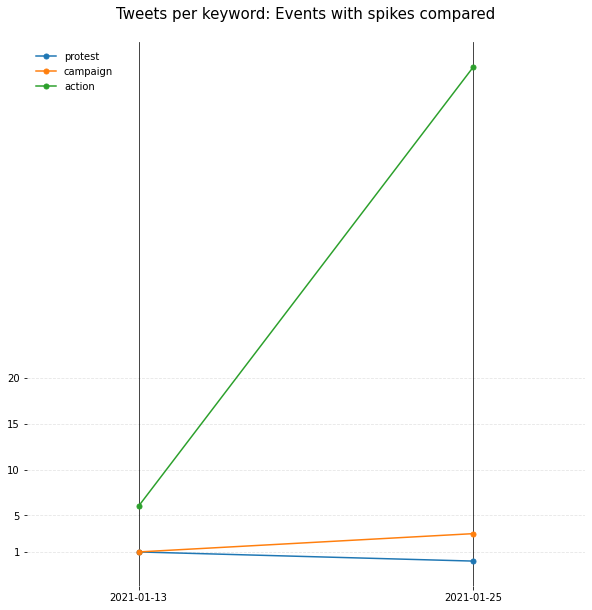

In [98]:
categories = ['protest', 'campaign', 'action']

fig, ax = plt.subplots(1, figsize=(10,10))



for i in categories:
    df1 = melted_event1[melted_event1['variable'] == i]
    plt.plot(df1.dates, df1.value, marker='o', markersize=5)
    # To include labels left and right (mostly overlapping)
    # texts = [plt.text(df1.dates.values[0], df1.value.values[0], i)] + [plt.text(df1.dates.values[1], df1.value.values[1], i, ha='right')]
    # To include labels in the middle
    
    # To include numbers right
    #plt.text(df1.dates.values[1], df1.value.values[1],
     #        '{:,.2f}'.format(df1.value.values[1]), 
      #       va='center', ha='right')
    
    
    # end label
    #plt.text(df1.dates.values[0], df1.value.values[0], i)
    # start label
    #plt.text(df1.dates.values[1], df1.value.values[1], i, ha='right')

ax.xaxis.grid(color='black', linestyle='solid', which='major', alpha=0.9)
ax.yaxis.grid(color='black', linestyle='dashed', which='both', alpha=0.1)
    
# ax.set_xticks([pd.to_datetime(t) for t in ['2021-01-13','2021-01-25']])
plt.xticks(('2021-01-13','2021-01-25'))
plt.yticks((1, 5, 10, 15, 20))
plt.xlim([pd.to_datetime(t) for t in ['2021-01-09','2021-01-29']])
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.legend(categories, loc='upper left', frameon=False)
plt.title('Tweets per keyword: Events with spikes compared\n', fontsize=15)
#filename = input('Please give the file a name and avoid overriding\n') + '.png'
#plt.savefig('/media/s/Linux_storage/Analyse_Verkehrswende_Transformation/plots/Greenwashing/' + filename, dpi=300)
plt.show()

### Multiple slopes chart

Now let's experiment with three dimensions and compare three events. For this, I will create a new dataframe where dates are transformed into numbers, so that distances between date. are neutralized.

In [55]:
# This code is not working
slope_event2 = keywords.resample('D').sum()
melted_long = pd.concat([slope_event2.loc['2021-01-12':'2021-01-14'],
                    slope_event2.loc['2021-01-24':'2021-01-26'], slope_event1.loc['2021-05-02':'2021-05-04']])
melted_long = melted_long.reset_index()
melted_long = melted_long.melt(id_vars=['dates'])


#slope_event1 = keywords.resample('D').sum()
#slope_event1 = pd.concat([slope_event1.loc['2021-01-13':'2021-01-13'],
#                    slope_event1.loc['2021-01-25':'2021-01-25']]) #, slope_event1.loc['2021-05-03':'2021-05-03']])
#slope_event1 = slope_event1.reset_index()
#melted_event1 = slope_event1.melt(id_vars=['dates'])

In [105]:
# Reset the index for three dates
slope_event1 = keywords.resample('D').sum()
slope_event1 = pd.concat([slope_event1.loc['2020-11-16':'2020-11-16'],
                    slope_event1.loc['2021-01-13':'2021-01-13'],
                    slope_event1.loc['2021-01-25':'2021-01-25'], 
                    slope_event1.loc['2021-05-03':'2021-05-03'], 
                    slope_event1.loc['2021-04-22':'2021-04-22'],
                    slope_event1.loc['2021-06-09':'2021-06-09']
                         ])
slope_event1 = slope_event1.reset_index()
melted_long = slope_event1.melt(id_vars=['dates'])

In [58]:
melted_long

,dates,variable,value
0,2021-01-13,protest,1
1,2021-01-25,protest,0
2,2021-05-03,protest,0
3,2021-01-13,misinformation,0
4,2021-01-25,misinformation,0
5,2021-05-03,misinformation,0
6,2021-01-13,accountability,0
7,2021-01-25,accountability,0
8,2021-05-03,accountability,1
9,2021-01-13,campaign,1


Please give the file a name and avoid overriding
 Greenwashing_alldates_slope_truth


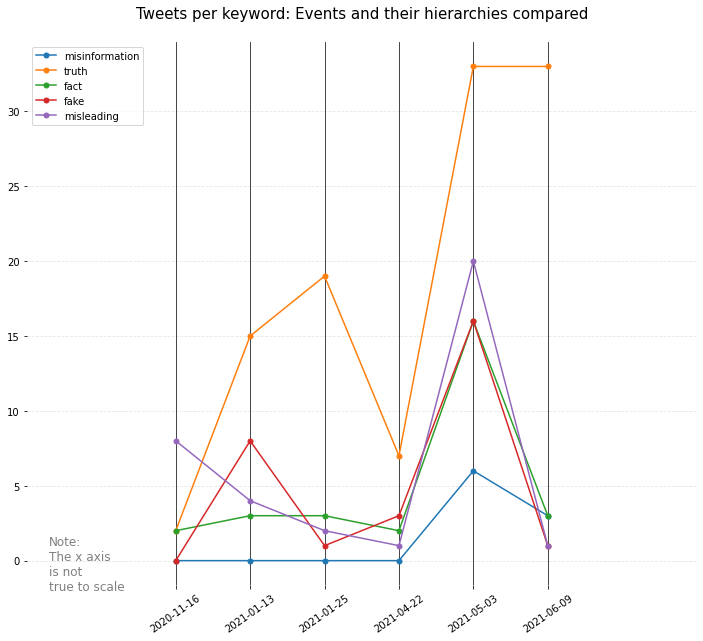

In [143]:
categories = ['misinformation', 'truth', 'fact', 'fake', 'misleading']
# select from:          'misinformation':misinformation,
#                        'accountability':accountability,
#                        'campaign':campaign,
#                        'truth':truth,
#                        'fact':fact,
#                        'fake':fake,
#                        'misleading':misleading,
#                        'pinkwashing':pinkwashing,
#                        'action':action,
#                        'marketing':marketing,
#                        'rights':rights,
#                        'advertising':advertising,

# Add colours to highlight only diverting graphs
# colors = ['#f3e798', '#477998', '#291F1E', '#BC9CB0', '#f3e798', '#f3e798', '#f3e798']
fig, ax = plt.subplots(1, figsize=(12,10))

x= ['2020-11-16', '2021-01-13', '2021-01-25', '2021-04-22', '2021-05-03', '2021-06-09'] # This is manually added and circumvents datatime interpretation by matplotlib

for i in categories:
    df1 = melted_long[melted_long['variable'] == i]
    plt.plot(x, df1.value, marker='o', markersize=5)
    
    # Add labels, but mind overlapping issues
    # end label
    #plt.text(x[0], df1.value.values[0], i, ha='right')
    # start label
    #plt.text(x[5], df1.value.values[5], i, ha='left')
    # mid label
    #plt.text(x[1], df1.value.values[1], i, ha='left')
    
# Some alternative options that could be used for datetimes    
# ax.set_xticks([pd.to_datetime(t) for t in ['2021-01-13','2021-01-25']])
#plt.xticks(('2021-01-13', '2021-01-25', '2021-05-03'))
#plt.yticks((5, 10, 15, 20))
plt.xlim(-2,7)

ax.xaxis.grid(color='black', linestyle='solid', which='major', alpha=0.9)
ax.yaxis.grid(color='black', linestyle='dashed', which='both', alpha=0.1)


# plt.axes(frameon=False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.legend(categories, loc='upper left', frameon=True)
plt.title('Tweets per keyword: Events and their hierarchies compared\n', fontsize=15)
plt.xticks(rotation=35)
ax.text(-1.7, -2, 'Note:\nThe x axis\nis not\ntrue to scale', fontsize=12, color='grey')
filename = input('Please give the file a name and avoid overriding\n') + '.png'
plt.savefig('/media/s/Linux_storage/Analyse_Verkehrswende_Transformation/plots/Greenwashing/' + filename, dpi=300)
plt.show()